## Classification

* Use Logistic Regression for binary classification
* Implement Logistic regression for binary classification
* Address overfitting using regularization, to improve model performance

#### binary classification
$y$ can only be one of two values, 0 or 1. 0 is also called the negative class, and 1 the positive class.

| Question | Answer $y$ |
| --- | --- |
| Is this email spam? | yes or no |
| Is this tumor malignant? | yes or no |
| Is the tumor malignant? | yes or no |
| Does this patient have diabetes? | yes or no |
| Is this image a dog? | yes or no |
| ... | ... |

#### Logistic Regression
Logistic regression is probably the single most important algorithm in the toolbox of any machine learning practitioner. It is the most fundamental algorithm for binary classification.


#### logistic function or sigmoid function

**Equation:** $g(z) = \frac{1}{1+e^{-z}}$ ; 0 <= g(z) <= 1

when z is positive large number, g(z) is close to 1

when z is negative large number, g(z) is close to 0

when z = 0, g(z) = 0.5 


$$ f_{\vec{W},b}(\vec{X}) = \vec{W}\cdot\vec{X} + b $$
$$ z = \vec{W}\cdot\vec{X} + b $$
$$ g(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\vec{W}\cdot\vec{X} + b)}} $$

**Probability notation** $P(y=1|\vec{X};\vec{W},b) = \frac{1}{1+e^{-(\vec{W}\cdot\vec{X} + b)}}$




In [4]:
import numpy as np

In [5]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    args:
        z (ndarray): A scalar or numpy array of any size
    returns:
        g (ndarray): sigmoid(z)
    """
    g = 1 / (1 + np.exp(-z))
    return g

In [6]:
z_tmp = np.arange(-10, 11)

y = sigmoid(z_tmp)
print(np.c_[z_tmp, y])

[[-1.00000000e+01  4.53978687e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.00000000e+00  2.47262316e-03]
 [-5.00000000e+00  6.69285092e-03]
 [-4.00000000e+00  1.79862100e-02]
 [-3.00000000e+00  4.74258732e-02]
 [-2.00000000e+00  1.19202922e-01]
 [-1.00000000e+00  2.68941421e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  7.31058579e-01]
 [ 2.00000000e+00  8.80797078e-01]
 [ 3.00000000e+00  9.52574127e-01]
 [ 4.00000000e+00  9.82013790e-01]
 [ 5.00000000e+00  9.93307149e-01]
 [ 6.00000000e+00  9.97527377e-01]
 [ 7.00000000e+00  9.99088949e-01]
 [ 8.00000000e+00  9.99664650e-01]
 [ 9.00000000e+00  9.99876605e-01]
 [ 1.00000000e+01  9.99954602e-01]]


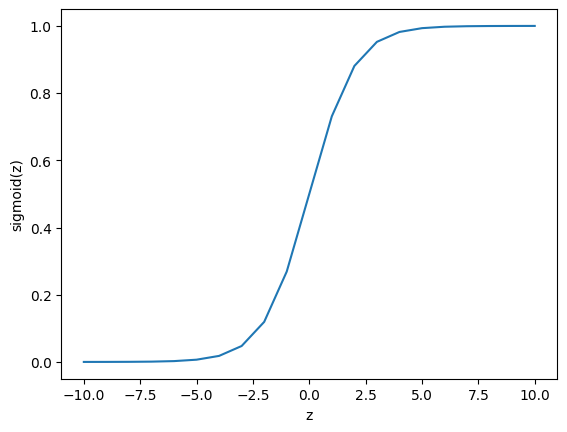

In [7]:

import matplotlib.pyplot as plt
# plot z vs sigmoid(z)
plt.plot(z_tmp, y)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.show()

### Decision Boundary

Is the line that separates the area where y = 0 and where y = 1. It is created by our hypothesis function.

Is $f_{\vec{W},b}(\vec{X}) >= 0.5$ or $f_{\vec{W},b}(\vec{X}) < 0.5$ ?

$yes: = 1 $ $no: = 0 $

|When is $f_{\vec{W},b}(\vec{X}) >= 0.5$ ?|When is $f_{\vec{W},b}(\vec{X}) < 0.5$ ?|
| --- | --- |
|$$g(z) >= 0.5$$|$$g(z) < 0.5$$|
|$$z >= 0$$ |$$z < 0$$|
|$$\vec{W}\cdot\vec{X} + b >= 0$$|$$\vec{W}\cdot\vec{X} + b < 0$$|
|$$\hat{y} = 1$$|$$\hat{y} = 0$$|


The line of the decission boundary is defined by the equation $\vec{W}\cdot\vec{X} + b = 0$

#### Cost function

##### Logistic loss function

The loss function for one training example is:


$$ f_{\vec{W},b}(\vec{X}) = \frac{1}{1+e^{-(\vec{W}\cdot\vec{X} + b)}} $$

$$L(f_{\vec{W},b}(\vec{X}),y) = L(\hat{y},y)$$

$$L(\hat{y},y) = \begin{cases}
-log(\hat{y}) & \text{if } y = 1 \\
-log(1-\hat{y}) & \text{if } y = 0
\end{cases}$$

$$ L(\hat{y},y) = -ylog(\hat{y}) - (1-y)log(1-\hat{y}) $$

When $y = 1$, $L(\hat{y},y) = -log(\hat{y})$:

* As $f_{\vec{W},b}(\vec{X})$ approaches 1, $L(\hat{y},y)$ approaches 0
* As $f_{\vec{W},b}(\vec{X})$ approaches 0, $L(\hat{y},y)$ approaches $\infty$
* Loss is lowest when the $f_{\vec{W},b}(\vec{X^{(i)}})$ correctly predicts or close to true label $y^{(i)}$

When $y = 0$, $L(\hat{y},y) = -log(1-\hat{y})$:

* As $f_{\vec{W},b}(\vec{X})$ approaches 0, $L(\hat{y},y)$ approaches 0
* As $f_{\vec{W},b}(\vec{X})$ approaches 1, $L(\hat{y},y)$ approaches $\infty$


##### Cost function

$$ J(\vec{W},b) = \frac{1}{m}\sum_{i=1}^{m}L(\hat{y}^{(i)},y^{(i)}) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(\hat{y}^{(i)}) + (1-y^{(i)})log(1-\hat{y}^{(i)}) $$

complete ecuation:

$$ J(\vec{W},b) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(\frac{1}{1+e^{-(\vec{W}\cdot\vec{X^{(i)}} + b)}}) + (1-y^{(i)})log(1-\frac{1}{1+e^{-(\vec{W}\cdot\vec{X^{(i)}} + b)}}) $$

##### Gradient Descent

$$ \begin{align*}
   repeat\ until\ convergence\ \{ \\
    &\vec{w_j} := \vec{w_j} - \alpha\frac{\partial}{\partial\vec{w_j}}J(\vec{W},b) \\
      &b := b - \alpha\frac{\partial}{\partial b}J(\vec{W},b) \\
   \}
   \end{align*}$$
   $$ \frac{\partial}{\partial\vec{w_j}}J(\vec{W},b) = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})x_j^{(i)} $$
   $$ \frac{\partial}{\partial b}J(\vec{W},b) = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)}) $$


In [8]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [9]:
def gradient_logistic_regression(X, y, w, b):
    """
    Compute the gradient of the loss with respect to w and b
    args:
        X (ndarray): input data of shape (m, n)
        y (ndarray): label of shape (m, 1)
        w (ndarray): weight of shape (n, 1)
        b (scalar): bias, a scalar
    returns:
        dw (ndarray): gradient of the cost with respect to w, shape (n, 1)
        db (scalar): gradient of the cost with respect to b
    """
    
    m = X.shape[0]
    n = X.shape[1]
    dj_w = np.zeros((n, 1))
    dj_b = 0
    #print(f'shapes: X: {X.shape}, y: {y.shape}, w: {w.shape}')
    z = X @ w + b
    #print(f'shape of z: {z.shape}')
    a = sigmoid(z)
    # using X.T because the same shape as w
    dj_w = 1/m * X.T @ (a - y)
    dj_b = 1/m * np.sum(a - y)
    return dj_w, dj_b
        
    

In [10]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = gradient_logistic_regression(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

shapes: X: (6, 2), y: (6,), w: (2,)
shape of z: (6,)
dj_db: 0.49861806546328574
dj_dw: [0.4983333932786961, 0.49883942983996693]


In [11]:
def cost_function(X, y, w, b):
    """
    Compute the cost function
    args:
        X (ndarray): input data of shape (m, n)
        y (ndarray): label of shape (m, 1)
        w (ndarray): weight of shape (n, 1)
        b (scalar): bias, a scalar
    returns:
        J (scalar): cost
    """
    m = X.shape[0]
    z = X @ w + b
    a = sigmoid(z)
    J = -1/m * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    return J

In [12]:

def gradient_logistic_regression_iter(X, y, w, b, alpha, num_iters):
    """
    Compute the gradient of the loss with respect to w and b
    args:
        X (ndarray): input data of shape (m, n)
        y (ndarray): label of shape (m, 1)
        w (ndarray): weight of shape (n, 1)
        b (scalar): bias, a scalar
        alpha (scalar): learning rate
    returns:
        w (ndarray): updated weight of shape (n, 1)
        b (scalar): updated bias
    """
    m = X.shape[0]
    j_history = []
    logs_by = num_iters // 10
    for i in range(num_iters):
        dj_w, dj_b = gradient_logistic_regression(X, y, w, b)
        w = w - alpha * dj_w
        b = b - alpha * dj_b
        
        j = cost_function(X, y, w, b)
        j_history.append(j)
        
        if num_iters % logs_by == 0:
            print(f'Cost after iteration {i}: {j}, w: {w}, b: {b}')
            
    return w, b, j_history
        
        

In [13]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_logistic_regression_iter(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

shapes: X: (6, 2), y: (6,), w: (2,)
shape of z: (6,)
Cost after iteration 0: 0.6846104685605738, w: [0.025      0.01666667], b: 0.0
shapes: X: (6, 2), y: (6,), w: (2,)
shape of z: (6,)
Cost after iteration 1: 0.6777854581883364, w: [0.04744911 0.03126819], b: -0.0014924742767851256
shapes: X: (6, 2), y: (6,), w: (2,)
shape of z: (6,)
Cost after iteration 2: 0.6722462191383932, w: [0.06768507 0.04409012], b: -0.004272983031330609
shapes: X: (6, 2), y: (6,), w: (2,)
shape of z: (6,)
Cost after iteration 3: 0.6676728580906668, w: [0.08600273 0.05538093], b: -0.008163518973895029
shapes: X: (6, 2), y: (6,), w: (2,)
shape of z: (6,)
Cost after iteration 4: 0.6638259339173811, w: [0.10265758 0.06535548], b: -0.013010041934451268
shapes: X: (6, 2), y: (6,), w: (2,)
shape of z: (6,)
Cost after iteration 5: 0.6605264712079517, w: [0.11787016 0.07419883], b: -0.018679730815057877
shapes: X: (6, 2), y: (6,), w: (2,)
shape of z: (6,)
Cost after iteration 6: 0.6576406943665212, w: [0.13183032 0.082

In [2]:
def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    args:
        X (ndarray): input data of shape (m, n)
        w (ndarray): weight of shape (n, 1)
        b (scalar): bias, a scalar
    returns:
        y_pred (ndarray): a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    m = X.shape[0]
    y_pred = np.zeros((m, 1))
    z = X @ w + b
    a = sigmoid(z)
    y_pred = np.where(a > 0.5, 1, 0)
    return y_pred

In [26]:
y_hat = sigmoid(X_train @ w_out + b_out)
print(f"y_hat: {y_hat}")
# convert y_hat to 0 or 1
y_hat = np.where(y_hat > 0.5, 1, 0)
print(f"y_hat: {y_hat}")

y_hat: [0.01862297 0.02057229 0.02272091 0.98463772 0.99849336 0.97711696]
y_hat: [0 0 0 1 1 1]


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_train)

array([0, 0, 0, 1, 1, 1])

### Overfitting

the overfitting problem is that the model is fitting the training set very well, but it is not generalizing well to new examples that it has never seen before.

* **Underfitting**: "High bias"
    * If our algorithm shows high bias, it means it does not fit the training data well and it performs poorly even in training data.
    * It is usually caused by a function that is too simple or uses too few features.
    * Solution: Use a more complex function or add more features.
* **Overfitting**: "High variance"
    * If our algorithm shows high variance, it means it fits the training data too well.
    * It performs very well on training data, but it does not generalize well.
    * Solution: Use fewer features or use regularization.

* **Generality**: "Just right"
    * If our algorithm shows good generality, it means it fits the training data well, and it also performs well on data that it has never seen before.
    * Solution: Just keep the model.
    

#### Addressing overfitting

* Collect more training data
* Select features to include or exclude
* Regularization: Reduce size of parameters $\vec{W}$



#### Regularization

Regularization is a technique used to reduce overfitting by discouraging overly complex models in some way.

**cost function with regularization**

$$ J(\vec{W},b) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})^2 + \frac{\lambda}{2m}\sum_{j=1}^{n}w_j^2$$

**L1 regularization**
$$ J(\vec{W},b) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(\frac{1}{1+e^{-(\vec{W}\cdot\vec{X^{(i)}} + b)}}) + (1-y^{(i)})log(1-\frac{1}{1+e^{-(\vec{W}\cdot\vec{X^{(i)}} + b)}}) + \frac{\lambda}{2m}\sum_{j=1}^{n}w_j^2$$

* $\lambda$ is the regularization parameter $\lambda >= 0$
* new cost function has aim to minimize the sum of the squared weights
* in some case any machine learning engineer can use the regularization $b$ parameter, but in other cases it is not necessary. $+ \frac{\lambda}{2m}b^2$
* When $\lambda$ is very large, the weights end up very close to zero, and the result is a very simple model that underfits the data.
* When $\lambda$ is very small, we effectively don't have regularization, and we're back to our original model.

##### Regularization for linear regression

$$ J(\vec{W},b) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})^2 + \frac{\lambda}{2m}\sum_{j=1}^{n}w_j^2$$

**gradient descent**

$$ \begin{align*}
   repeat\ until\ convergence\ \{ \\
    &\vec{w_j} := \vec{w_j} - \alpha\frac{\partial}{\partial\vec{w_j}}J(\vec{W},b) \\
      &b := b - \alpha\frac{\partial}{\partial b}J(\vec{W},b) \\
   \}
   \end{align*}$$
   $$ \frac{\partial}{\partial\vec{w_j}}J(\vec{W},b) = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}w_j $$
   $$ \frac{\partial}{\partial b}J(\vec{W},b) = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)}) $$

* In this case $b$ is not regularized

#### Regularization for logistic regression

$$ J(\vec{W},b) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(\hat{y}^{(i)}) + (1-y^{(i)})log(1-\hat{y}^{(i)}) + \frac{\lambda}{2m}\sum_{j=1}^{n}w_j^2$$


**gradient descent**

$$ \begin{align*}
   repeat\ until\ convergence\ \{ \\
    &\vec{w_j} := \vec{w_j} - \alpha\frac{\partial}{\partial\vec{w_j}}J(\vec{W},b) \\
      &b := b - \alpha\frac{\partial}{\partial b}J(\vec{W},b) \\
   \}
   \end{align*}$$
   $$ \frac{\partial}{\partial\vec{w_j}}J(\vec{W},b) = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}w_j $$
   $$ \frac{\partial}{\partial b}J(\vec{W},b) = \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)}) $$

* gradient descent is identical to the one we use for linear regression
   

In [5]:
import numpy as np
l = np.array([1, 2, 3])
l**2

array([1, 4, 9])